<a href="https://colab.research.google.com/github/susheem-mukul/deep-learning/blob/main/End_Effector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def rand(start,end,num):
  res=[]
  for j in range(num):
    res.append(random.uniform(start,end))
  
  return res

In [ ]:
q1=rand(0,3.14,1000)
q2=rand(-3.14,0,1000)
q3=rand(-3.14/2,3.14/2,1000)
fi=rand(0,2*math.pi,1000)


In [ ]:
l1=2
l2=2
l3=2

In [ ]:
x=[]
y=[]
th=[]
xp=[]
yp=[]
fie=[]
for f in range(0,1000):
  x.append(l1*math.cos(q1[f])+l2*math.cos(q1[f]+q2[f])+l3*math.cos(q1[f]+q2[f]+q3[f]))
  y.append(l1*math.sin(q1[f])+l2*math.sin(q1[f]+q2[f])+l3*math.sin(q1[f]+q2[f]+q3[f]))
  th.append(q1[f]+q2[f]+q3[f])
  xp.append(2+2*math.cos(fi[f]))
  yp.append(2+2*math.sin(fi[f]))
  fie.append(math.tan(yp[f]/xp[f]))

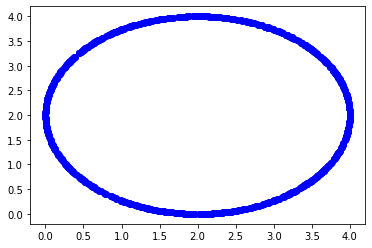

In [ ]:
plt.plot(xp,yp,'bo')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
from pandas import DataFrame
df=pd.DataFrame(list(zip(q1,q2,q3,x,y,th)),columns=['q1','q2','q3','x','y','th'])

In [ ]:
df

,q1,q2,q3,x,y,th
0,2.588743,-2.250442,-1.310468,1.311598,0.061780,-0.972167
1,1.804829,-2.244890,1.110772,2.912408,2.336575,0.670711
2,0.760120,-0.864386,1.081864,4.556676,2.828178,0.977599
3,1.630860,-0.214040,0.899577,-1.170142,5.442094,2.316396
4,2.747781,-2.324327,0.151060,1.655358,2.676098,0.574513
...,...,...,...,...,...,...
995,1.989836,-2.257411,-1.155744,1.408949,-0.680117,-1.423320
996,2.991663,-1.725491,-0.556955,0.140052,3.509136,0.709217
997,2.700115,-0.298469,-0.075345,-4.656565,3.658898,2.326301
998,1.743115,-1.480126,0.826321,2.514496,4.262930,1.089309


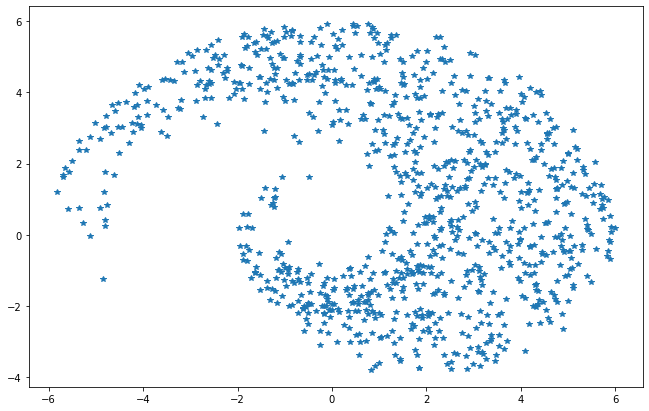

In [ ]:
plt.figure(figsize=(11,7))
plt.plot(x,y,'*')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Dense(3,activation='relu'))
model.add(Dense(100,activation='tanh'))
model.add(Dense(3,activation='relu'))

model.compile(optimizer='adam',loss='mse')

In [ ]:
x1=df[['x','y','th']]

In [ ]:
y1=df[['q1','q2','q3']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size=0.3,random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape

(700, 3)

In [ ]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=20)

Epoch 1/20
22/22 [==============================] - 1s 9ms/step - loss: 2.2997 - val_loss: 2.2580
Epoch 2/20
22/22 [==============================] - 0s 3ms/step - loss: 2.0586 - val_loss: 1.9129
Epoch 3/20
22/22 [==============================] - 0s 3ms/step - loss: 1.6754 - val_loss: 1.7337
Epoch 4/20
22/22 [==============================] - 0s 3ms/step - loss: 1.5946 - val_loss: 1.7163
Epoch 5/20
22/22 [==============================] - 0s 3ms/step - loss: 1.5655 - val_loss: 1.7077
Epoch 6/20
22/22 [==============================] - 0s 3ms/step - loss: 1.6021 - val_loss: 1.6971
Epoch 7/20
22/22 [==============================] - 0s 3ms/step - loss: 1.6042 - val_loss: 1.6830
Epoch 8/20
22/22 [==============================] - 0s 4ms/step - loss: 1.5926 - val_loss: 1.6683
Epoch 9/20
22/22 [==============================] - 0s 4ms/step - loss: 1.5079 - val_loss: 1.6525
Epoch 10/20
22/22 [==============================] - 0s 3ms/step - loss: 1.5914 - val_loss: 1.6367
Epoch 11/20
22/22 [

In [ ]:
losses = pd.DataFrame(model.history.history)

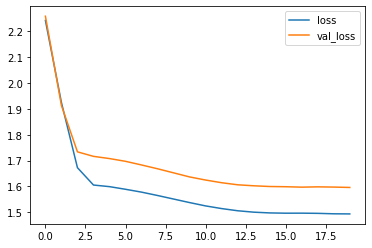

In [ ]:
losses.plot()

In [ ]:
df1=pd.DataFrame(list(zip(xp,yp,fie)),columns=['xp','yp','fie'])

In [ ]:
pred=model.predict(df1)

In [ ]:
p=pred

In [ ]:
qq1=p[:,0]
qq2=p[:,1]
qq3=p[:,2]

In [ ]:
xx=[]
yy=[]
theta=[]
for f in range(0,1000):
  xx.append(l1*math.cos(qq1[f])+l2*math.cos(qq1[f]+qq2[f])+l3*math.cos(qq1[f]+qq2[f]+qq3[f]))
  yy.append(l1*math.sin(qq1[f])+l2*math.sin(qq1[f]+qq2[f])+l3*math.sin(qq1[f]+qq2[f]+qq3[f]))
  theta.append(qq1[f]+qq2[f]+qq3[f])

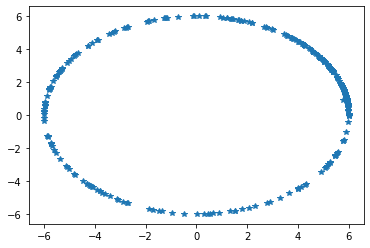

In [ ]:
plt.plot(xx,yy,'*')